In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./Data/mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


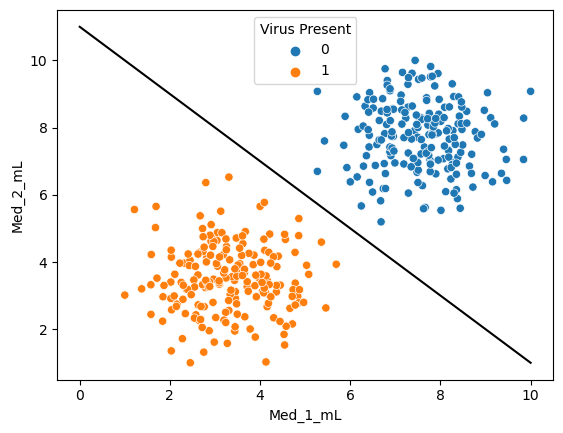

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

# HYPERPLANE
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y,'black')

In [5]:
from sklearn.svm import SVC

In [6]:
X = df.drop('Virus Present',axis=1)
y = df['Virus Present']

## Linear kernel

In [7]:
model = SVC(kernel='linear',C=1000)
# C is a measurement of how many points are allowed within the margin.
# If C gets a smaller value the more points to go withn the margin.
# The C in scikit-learn is inversely proportional to the margin

In [8]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [9]:
from svm_margin_plot import plot_svm_boundary

/home/harshan/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


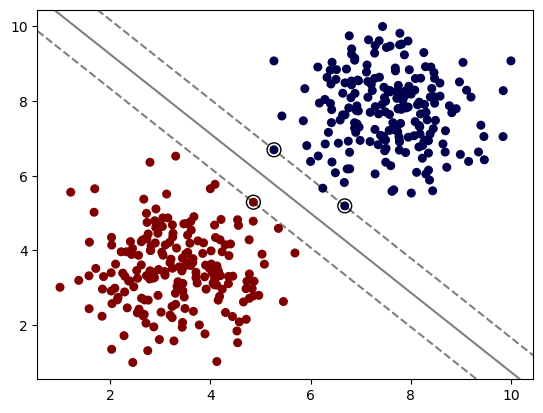

In [10]:
plot_svm_boundary(model,X,y)

In [11]:
model = SVC(kernel='linear',C=0.01)
model.fit(X,y)

SVC(C=0.01, kernel='linear')

/home/harshan/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


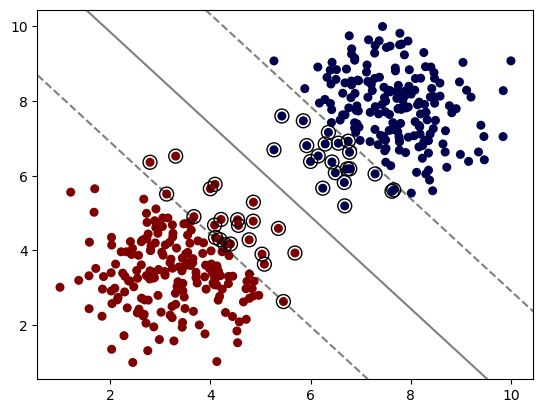

In [12]:
plot_svm_boundary(model,X,y)

## Radial basis function kernel(RBF)

/home/harshan/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


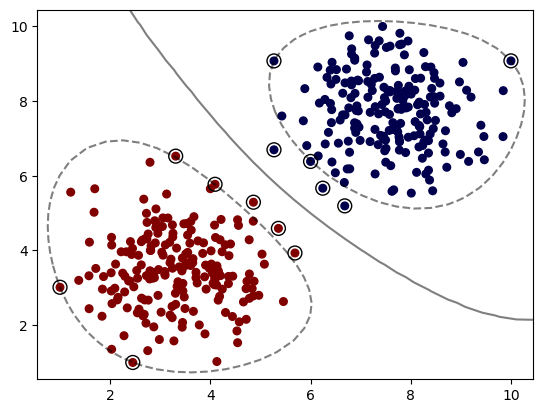

In [13]:
# The defualt kernel for SVC in scitkit-learn in 'rbf'
model = SVC(kernel='rbf',C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

## Sigmoid kernel

/home/harshan/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


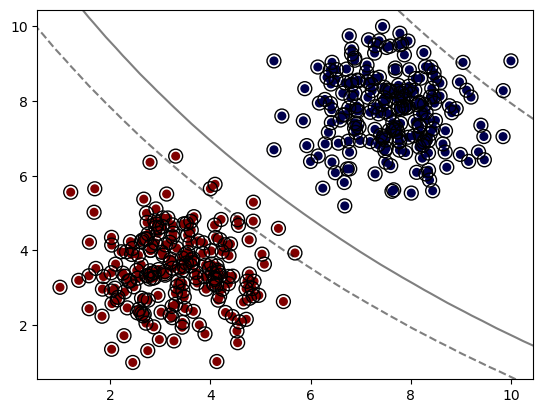

In [14]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

# This dataset dosn't perform well in this dataset because
# almost all the points are being highlighted as support vectrs

## Polynomial kernel

/home/harshan/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


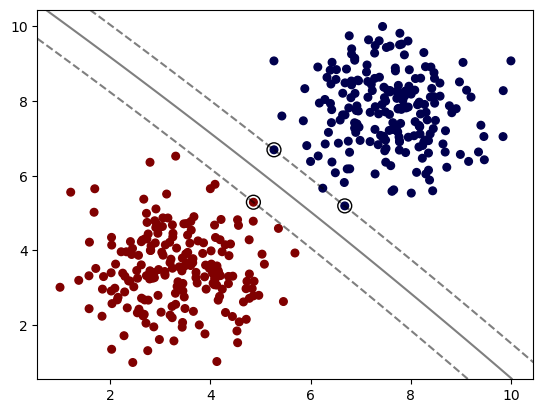

In [15]:
model = SVC(kernel='poly',C=1,degree=2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

## Grid search

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [18]:
grid = GridSearchCV(svm,param_grid)

In [19]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [20]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [21]:
## A Linear kenel and C value of 0.01 is going to perform good in this dataset.